In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
data = pd.read_csv('C:/Users/ruchi/Desktop/Indicators.csv')

In [28]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


#### Shape of the data:

In [5]:
data.shape

(5656458, 6)

#### Number of countries: 

In [6]:
countries = data['CountryCode'].value_counts()
countries.shape

(247,)

#### Number of Indicators:

In [7]:
# This is another method to count unique values
# indicators = data['IndicatorCode'].unique()
# indicators.shape
indicators = data['IndicatorCode'].value_counts()
indicators.shape

(1344,)

#### Number of Years:

In [8]:
years = data['Year'].value_counts()
len(years)

56

In [9]:
# first year :
data['Year'].min()

1960

In [10]:
# latest year :
data['Year'].max()

2015

### Plotting

**Creating Filters for CO2 emission (metric tons per capita) indicator of USA as country**

In [41]:
CO2_emissions = data['IndicatorName'].str.contains('CO2 emissions \(metric tons per capita\)')
CO2_emissions.any()

True

In [42]:
united_states = data['CountryCode'].str.contains('USA')
united_states.any()

True

In [43]:
usa_emissions = data[CO2_emissions & united_states]
usa_emissions.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
77087,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
105704,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
134742,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


#### How CO2 emissions have changed over years for USA

In [45]:
country_name = usa_emissions.iloc[0, 0]
country_code = usa_emissions.iloc[0, 1]
indicator_name = usa_emissions.iloc[0, 2]
indicator_code = usa_emissions.iloc[0, 3]
print(country_name, ",", country_code, ",", indicator_name, ",", indicator_code)

United States , USA , CO2 emissions (metric tons per capita) , EN.ATM.CO2E.PC


In [46]:
del usa_emissions['CountryCode']
del usa_emissions['CountryName']
del usa_emissions['IndicatorCode']
del usa_emissions['IndicatorName']
usa_emissions.head()

,Year,Value
22232,1960,15.999779
48708,1961,15.681256
77087,1962,16.013937
105704,1963,16.482762
134742,1964,16.968119


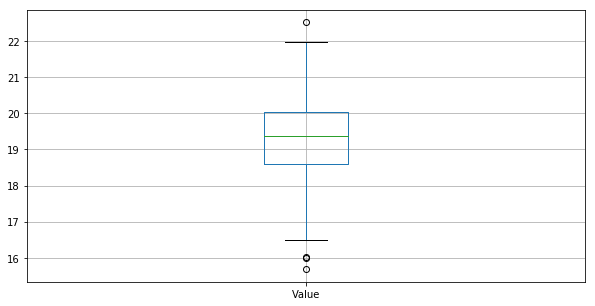

In [48]:
usa_emissions.boxplot(column = 'Value', figsize = (10, 5))

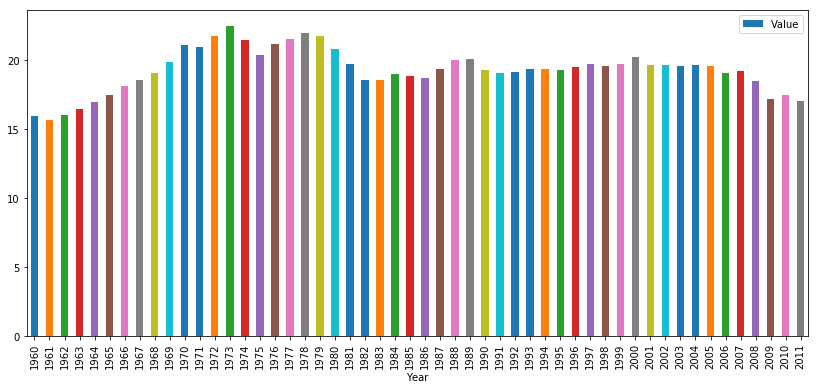

In [69]:
usa_emissions.plot(kind = 'bar', x = 'Year', y = 'Value', figsize = (14, 6))

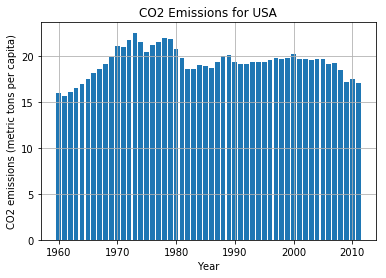

In [148]:
plt.bar(usa_emissions['Year'], usa_emissions['Value'])
plt.xlabel('Year')
plt.ylabel(indicator_name)
plt.title('CO2 Emissions for USA')
plt.grid(True)
plt.show()

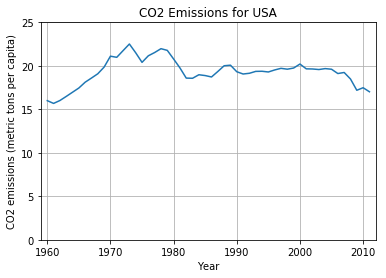

In [110]:
plt.plot(usa_emissions['Year'], usa_emissions['Value'])
plt.axis([1959, 2012, 0, 25]) # to avoid misleading the audience , start the y - xis at 0
plt.xlabel('Year')
plt.ylabel(indicator_name)
plt.title('CO2 Emissions for USA')
plt.grid(True)
plt.show()

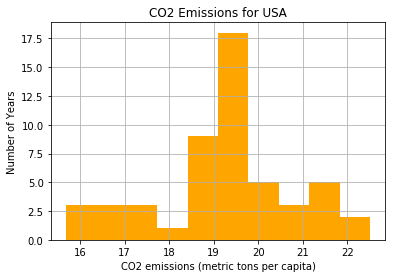

In [111]:
plt.hist(usa_emissions['Value'].values, 10, density = False, color = 'Orange', )
plt.title('CO2 Emissions for USA')
plt.xlabel(indicator_name)
plt.ylabel('Number of Years')
plt.grid(True)
plt.show()

### How do USA's numbers stack up against other countries

In [133]:
data.dtypes

CountryName       object
CountryCode       object
IndicatorName     object
IndicatorCode     object
Year               int64
Value            float64
dtype: object

In [135]:
year_2011 = data['Year'] == 2011
CO2_2011 = data[CO2_emissions & year_2011]
CO2_2011.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


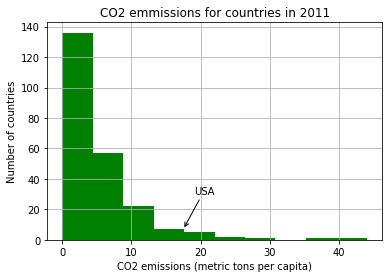

In [159]:
fig, ax = plt.subplots()
ax.annotate(xy = (17.5, 7), 
            s = 'USA', 
            xytext = (19, 30), xycoords = 'data', 
            arrowprops = dict(arrowstyle='->', connectionstyle = 'arc3'))
plt.hist(CO2_2011['Value'], 10, density = False, color = 'Green')
plt.xlabel(indicator_name)
plt.ylabel('Number of countries')
plt.title('CO2 emmissions for countries in 2011')
plt.grid(True)
plt.show()

### Line Charts and Scatterplots

**Relationship between GDP and CO2 emissions in USA**

In [205]:
gdp_mask = data['IndicatorName'].str.contains('GDP per capita \(current US\$\)')
usa_gdp = data[united_states & gdp_mask]
usa_gdp.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22285,United States,USA,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,3007.123445
48762,United States,USA,GDP per capita (current US$),NY.GDP.PCAP.CD,1961,3066.562869
77145,United States,USA,GDP per capita (current US$),NY.GDP.PCAP.CD,1962,3243.843078
105763,United States,USA,GDP per capita (current US$),NY.GDP.PCAP.CD,1963,3374.515171
134801,United States,USA,GDP per capita (current US$),NY.GDP.PCAP.CD,1964,3573.941185


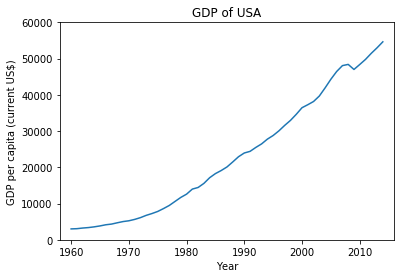

In [206]:
plt.plot(usa_gdp['Year'], usa_gdp['Value'])
plt.axis([1958, 2016, 0, 60000])
plt.xlabel('Year')
plt.ylabel(usa_gdp.iloc[0, 2])
plt.title('GDP of USA')
plt.show()

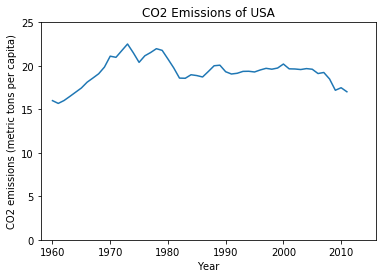

In [207]:
plt.plot(usa_emissions['Year'], usa_emissions['Value'])
plt.axis([1958, 2016, 0, 25])
plt.xlabel('Year')
plt.ylabel(indicator_name)
plt.title('CO2 Emissions of USA')
plt.show()

In [208]:
print('GDP :', usa_gdp['Year'].min(), 'to', usa_gdp['Year'].max())
print('CO2 emissions :', usa_emissions['Year'].min(), 'to', usa_emissions['Year'].max())

GDP : 1960 to 2014
CO2 emissions : 1960 to 2011


In [209]:
usa_gdp = usa_gdp[usa_gdp['Year'] <= 2011]

In [210]:
print(usa_gdp['Year'].shape, usa_emissions['Year'].shape)
# the shape of x and y axes values need to be same for making a plot

(52,) (52,)


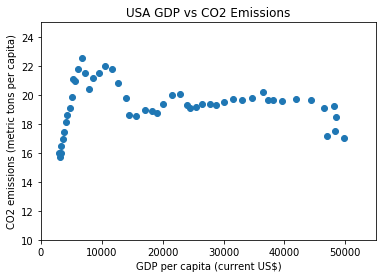

In [219]:
plt.scatter(usa_gdp['Value'], usa_emissions['Value'])
plt.xlabel(usa_gdp.iloc[0, 2])
plt.ylabel(indicator_name)
plt.axis([0, 55000, 10, 25])
plt.title('USA GDP vs CO2 Emissions')
plt.show()

In [220]:
import numpy as np
np.corrcoef(usa_gdp['Value'], usa_emissions['Value'])
# shows weak correlation

array([[ 1.        , -0.07247058],
       [-0.07247058,  1.        ]])